# Exploratory Data Analysis (EDA)


In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_weather = pd.read_csv('../data/GlobalWeatherRepository.csv')
df_weather.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
# Overview of the dataset
print("Dataset shape:", df_weather.shape)
print(f"\nData Types:\n{df_weather.dtypes}")
print(f"\nSummery Statistics:\n{df_weather.describe(include='all')}")

Dataset shape: (98799, 41)

Data Types:
country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64


## Visualize Distributions of key features

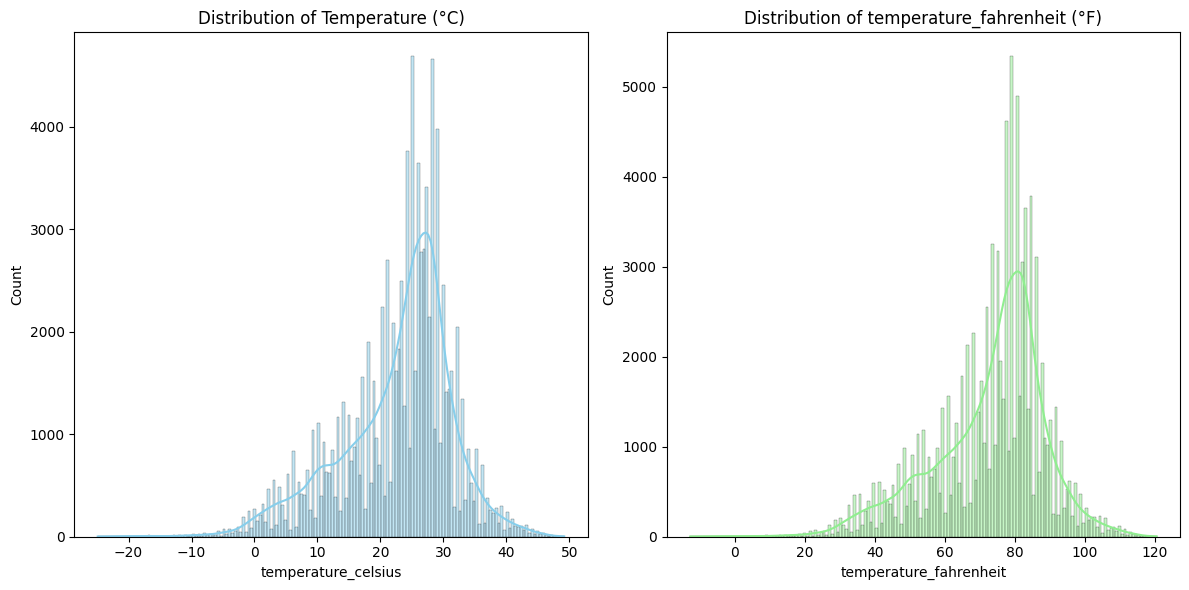

In [4]:
# For temperature_celsius and temperature_fahrenheit
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(df_weather['temperature_celsius'], color='skyblue', kde=True)
plt.title("Distribution of Temperature (°C)")

plt.subplot(1, 2, 2)
sns.histplot(df_weather['temperature_fahrenheit'], kde=True, color='lightgreen')
plt.title('Distribution of temperature_fahrenheit (°F)')

plt.tight_layout()
plt.show()

## Correlation Heatmap

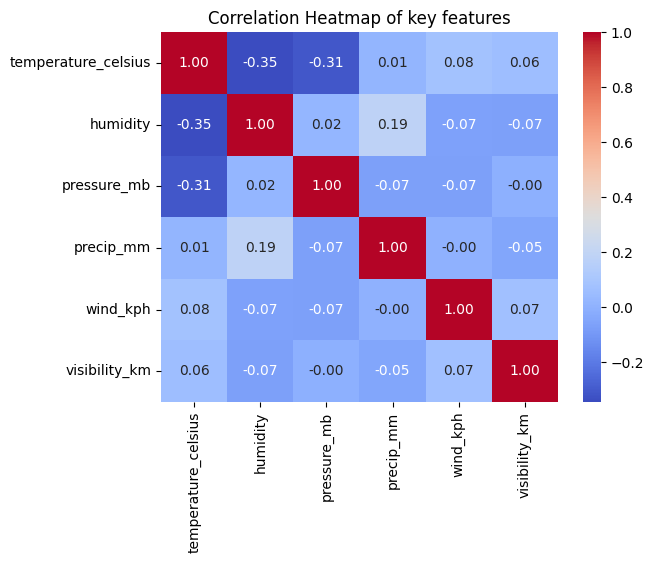

In [5]:
plt.Figure(figsize=(12, 6))
corr = df_weather[['temperature_celsius', 'humidity', 'pressure_mb', 'precip_mm', 'wind_kph', 'visibility_km']].corr()
sns.heatmap(corr,annot=True , cmap='coolwarm' , fmt=".2f")
plt.title("Correlation Heatmap of key features")
plt.show()

## Country-Level temperature trends

C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_8864\3231507193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp_by_country.values, y=avg_temp_by_country.index, palette='viridis')


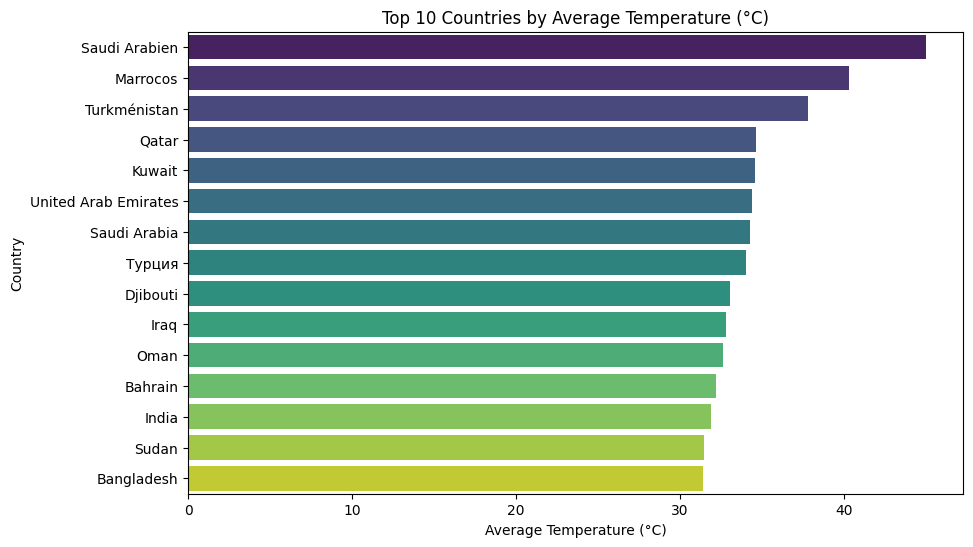

In [6]:
avg_temp_by_country = df_weather.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_temp_by_country.values, y=avg_temp_by_country.index, palette='viridis')
plt.title("Top 10 Countries by Average Temperature (°C)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Country")
plt.show()

## Relationship between features

### 1- Temperature and Precipitation

In [7]:
sns.set_style("whitegrid")

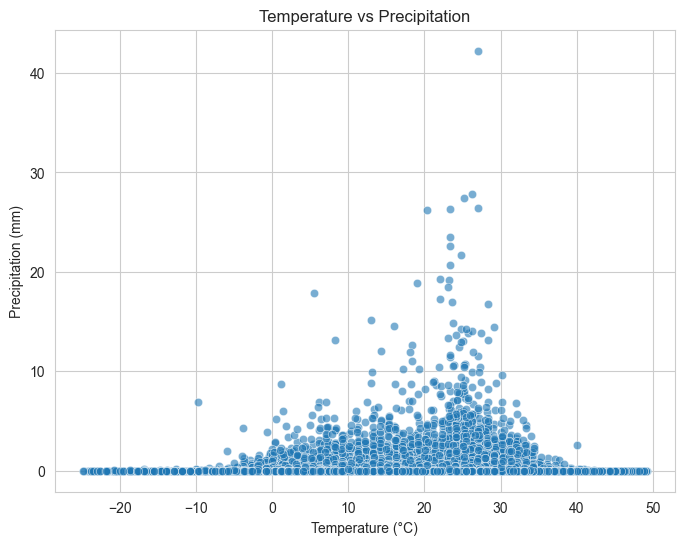

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_celsius', y='precip_mm', data=df_weather, alpha=0.6)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()


### 2- Temperature Celsius vs Fahrenheit

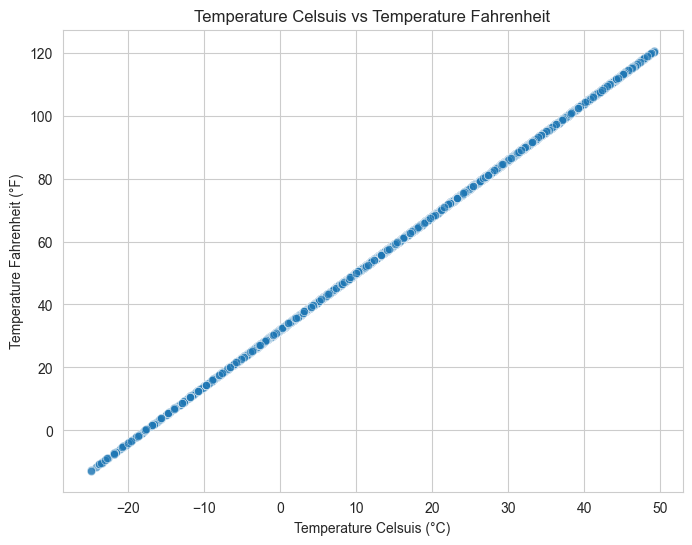

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_celsius', y='temperature_fahrenheit', data=df_weather, alpha=0.6)
plt.title('Temperature Celsuis vs Temperature Fahrenheit')
plt.xlabel('Temperature Celsuis (°C)')
plt.ylabel('Temperature Fahrenheit (°F)')
plt.show()

### 3- Temperature vs Humidity

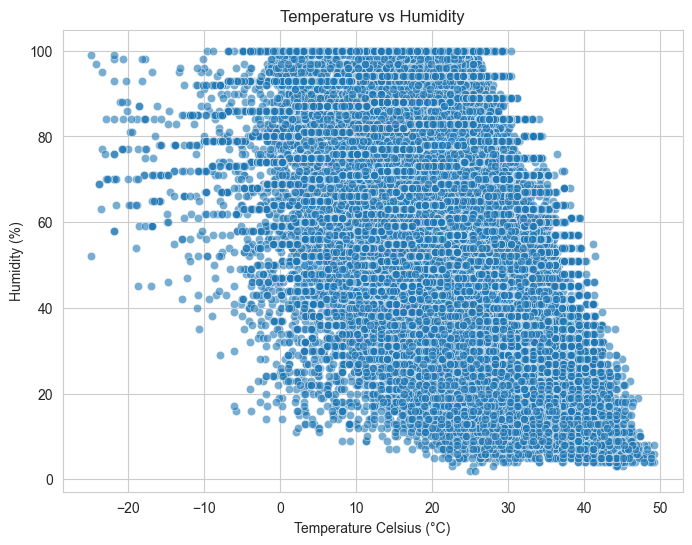

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_celsius', y='humidity', data=df_weather, alpha=0.6)
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature Celsius (°C)')
plt.ylabel('Humidity (%)')
plt.show()

### 4- Cloud Cover vs UV Index

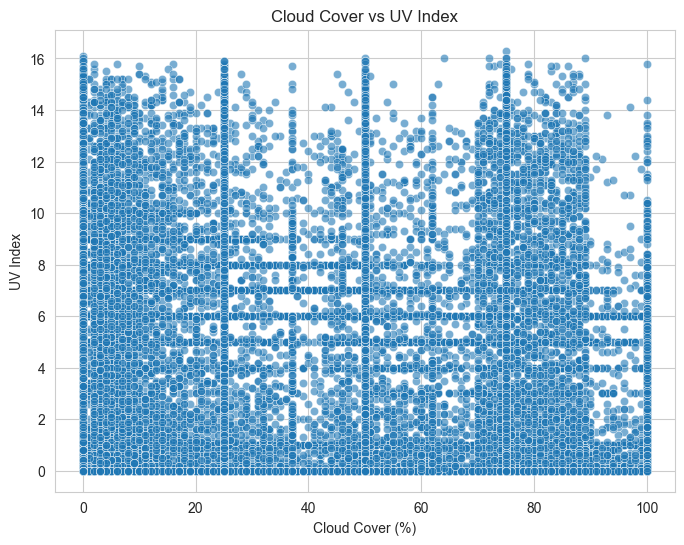

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cloud', y='uv_index', data=df_weather, alpha=0.6)
plt.title('Cloud Cover vs UV Index')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('UV Index')
plt.show()

### 5- Pressure vs Precipitation

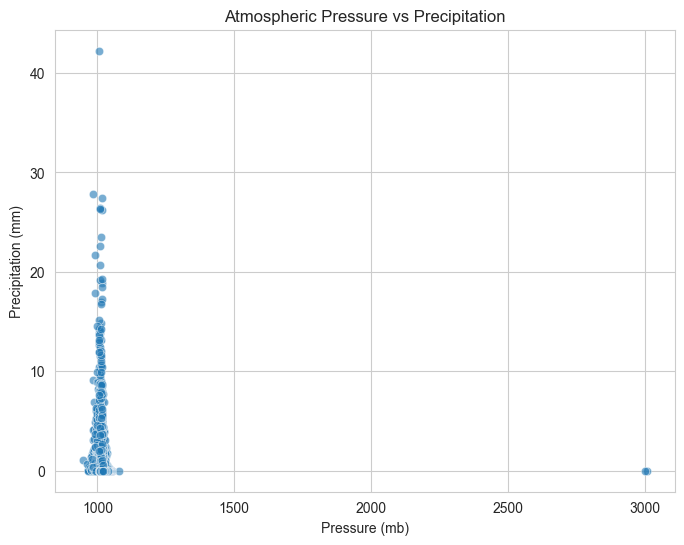

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pressure_mb', y='precip_mm', data=df_weather, alpha=0.6)
plt.title('Atmospheric Pressure vs Precipitation')
plt.xlabel('Pressure (mb)')
plt.ylabel('Precipitation (mm)')
plt.show()

### 6- PM2.5 vs PM10 (Air Quality)

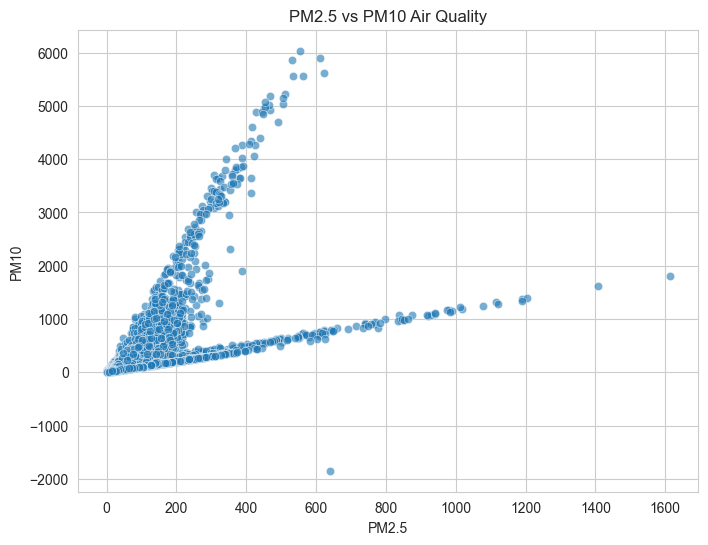

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='air_quality_PM2.5', y='air_quality_PM10', data=df_weather, alpha=0.6)
plt.title('PM2.5 vs PM10 Air Quality')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()

### 7- Wind Speed vs Visibility

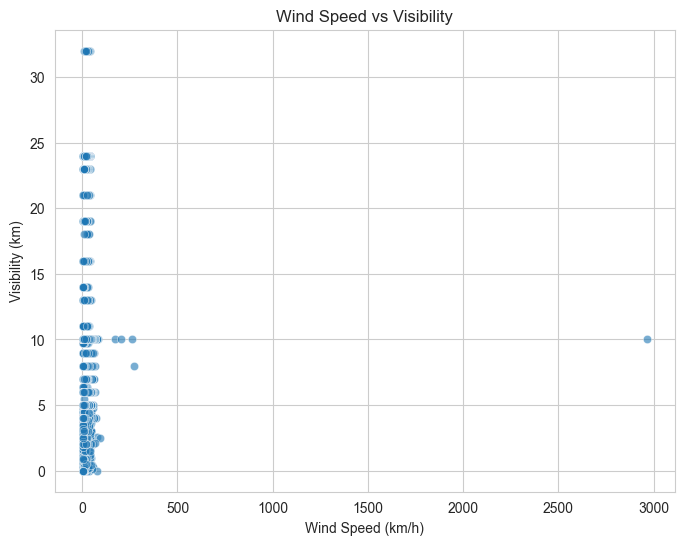

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='wind_kph', y='visibility_km', data=df_weather, alpha=0.6)
plt.title('Wind Speed vs Visibility')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Visibility (km)')
plt.show()

### 8- Latitude vs Temperature

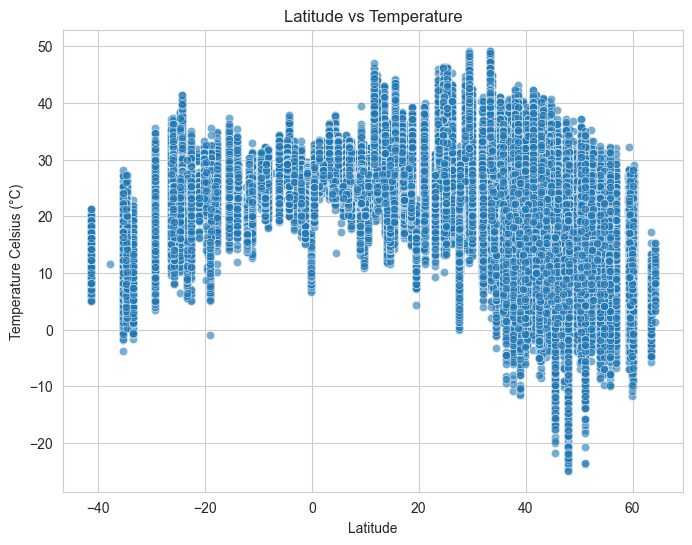

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='latitude', y='temperature_celsius', data=df_weather, alpha=0.6)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature Celsius (°C)')
plt.show()

## Temporal trend

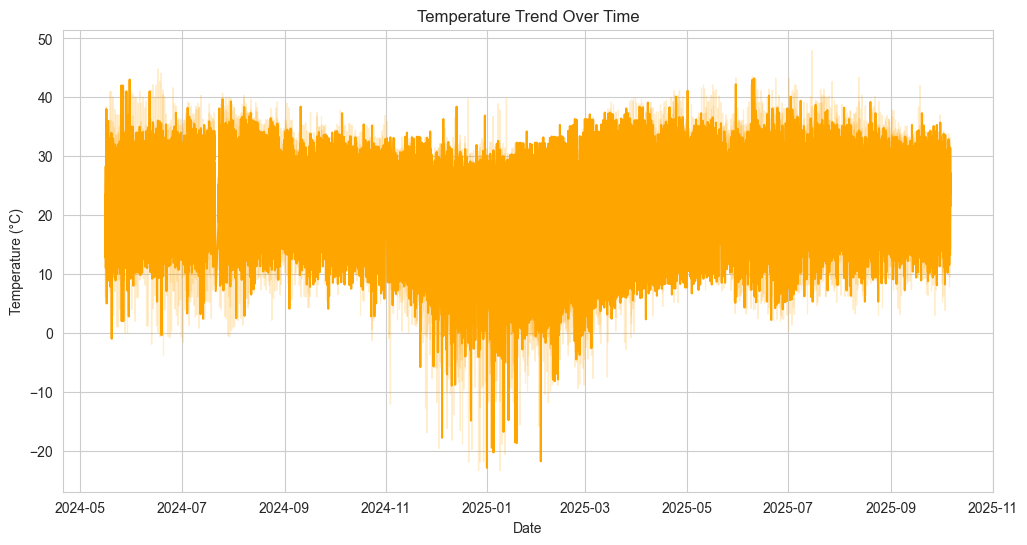

In [16]:
df_weather['last_updated'] = pd.to_datetime(df_weather['last_updated'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='last_updated', y='temperature_celsius', data=df_weather, color='orange')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


## Weather condition frequency

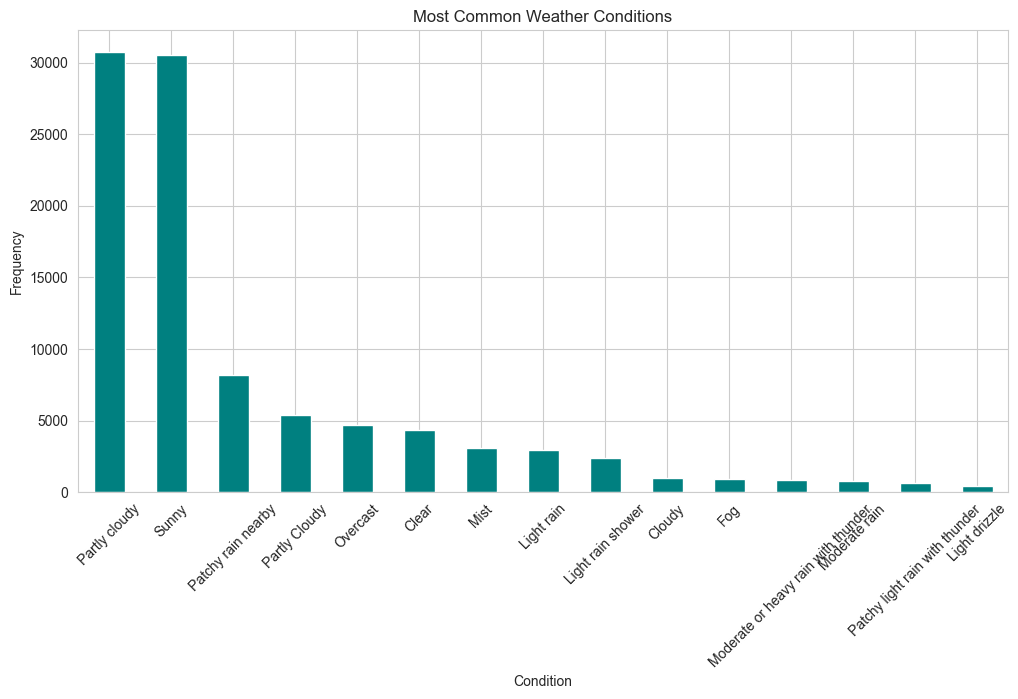

In [17]:
plt.figure(figsize=(12, 6))
df_weather['condition_text'].value_counts().head(15).plot(kind='bar', color='teal')
plt.title('Most Common Weather Conditions')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## PCA for Dimensionality Reduction

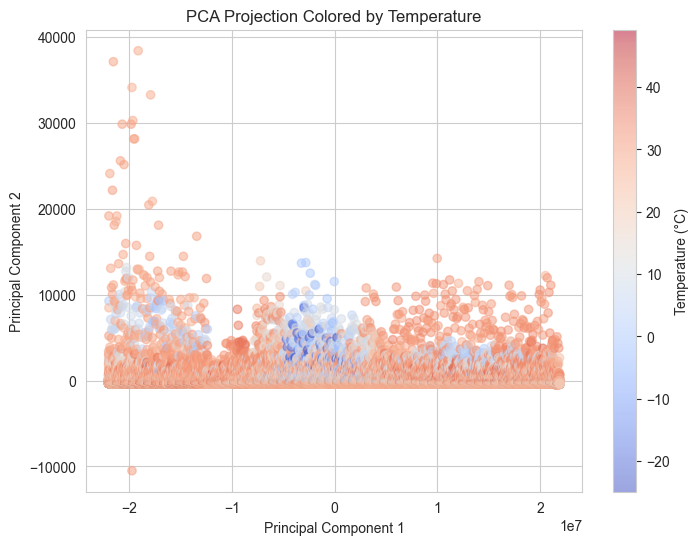

Explained variance ratio: 100.00%


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

categorical_cols = ['country', 'location_name', 'timezone', 'condition_text', 'wind_direction', 'moon_phase']
df_encoded = df_weather.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

features_for_pca = df_encoded.select_dtypes(include=[np.number]).dropna(axis=1)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_for_pca)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5, c=df_encoded['temperature_celsius'], cmap='coolwarm')
plt.title('PCA Projection Colored by Temperature')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Temperature (°C)')
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.2%}")



## Heat index vs actual temperature

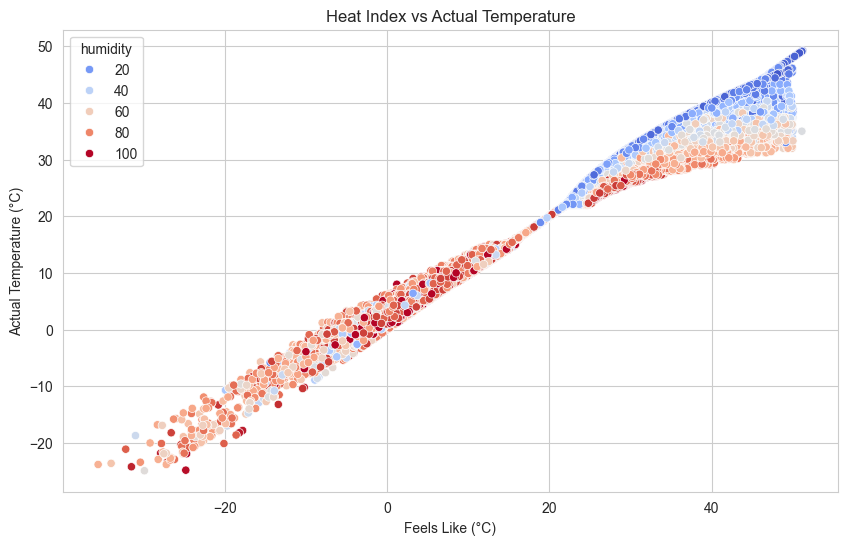

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='feels_like_celsius', y='temperature_celsius', hue='humidity', data=df_weather, palette='coolwarm')
plt.title('Heat Index vs Actual Temperature')
plt.xlabel('Feels Like (°C)')
plt.ylabel('Actual Temperature (°C)')
plt.show()


## Thanks